In [50]:
!pip install selectivesearch
!git clone https://github.com/minmaxHong/ComputerVision

fatal: destination path 'ComputerVision' already exists and is not an empty directory.


#### 임의의 ground_box를 만들고 시각화하기

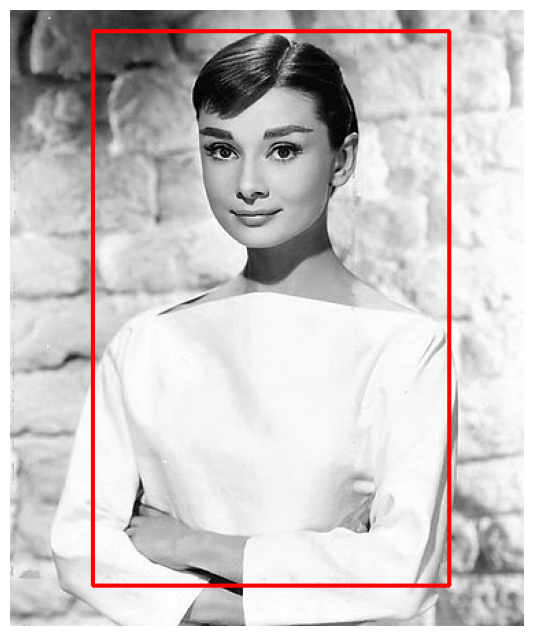

In [51]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

# == label box ==
ground_box = [60, 15, 320, 420]

img = cv.imread('/content/ComputerVision/data/Image/audrey01.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_rgb_copy = img_rgb.copy()

img_rgb = cv.rectangle(img_rgb, (ground_box[0], ground_box[1]), (ground_box[2], ground_box[3]), color = (255, 0, 0), thickness = 2)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

#### IOU 함수화

In [52]:
import numpy as np

def cal_iou(ground, predict):
  x1 = np.maximum(ground[0], predict[0])
  y1 = np.maximum(ground[1], predict[1])
  x2 = np.minimum(ground[2], predict[2])
  y2 = np.minimum(ground[3], predict[3])

  overlap_space = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)

  # 두개의 사각형 더하고 overlap_space빼면 될듯
  ground_area = (ground[2] - ground[0]) * (ground[3] - ground[1])
  predict_area = (predict[2] - predict[0]) * (predict[3] - predict[1])

  union_space = ground_area + predict_area - overlap_space

  IOU = overlap_space / union_space

  return IOU

#### selectivesearch를 통해 predict bounding box 만들고 시각화

In [53]:
import selectivesearch

img_segments, regions = selectivesearch.selective_search(img_rgb, scale = 50, min_size = 10000)

type(regions), len(regions)

(list, 9)

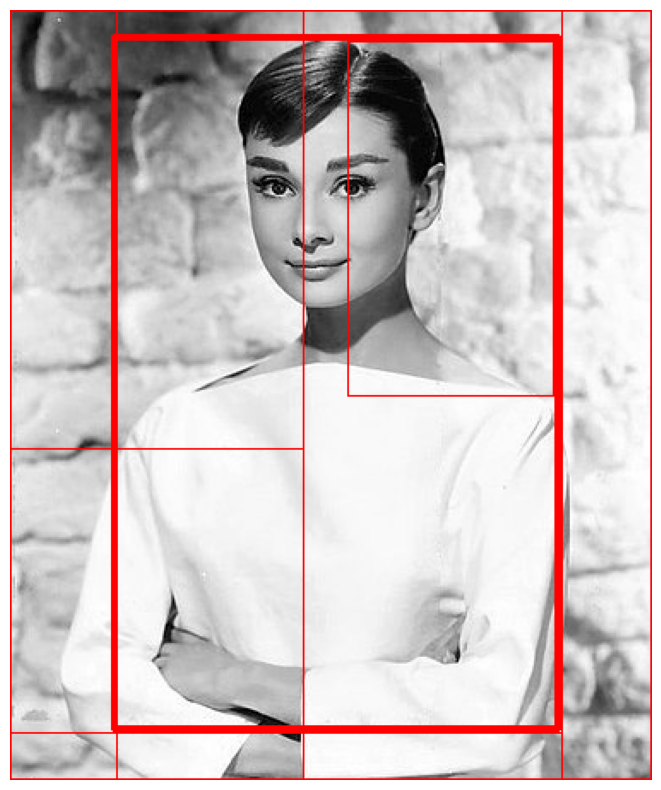

In [54]:
predict_box = [cand['rect'] for cand in regions]

for rect in predict_box:
  x1 = rect[0]
  y1 = rect[1]
  x2 = x1 + rect[2]
  y2 = y1 + rect[3]

  img_rgb = cv.rectangle(img_rgb, (x1, y1), (x2, y2), color = (255, 0, 0), thickness = 1)

plt.figure(figsize = (10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

#### IOU를 통해 가장 적합한 predict bounding box 찾기

In [55]:
predict_box = [cand['rect'] for cand in regions]
max = 0
best_box = []

for index, rect in enumerate(predict_box):
  rect = list(rect)
  rect[2] += rect[0]
  rect[3] += rect[1]

  iou = cal_iou(ground_box, rect)

  print(f"index : {index}, IOU : {iou}")

  if max < iou:
    max = iou
    best_box = rect

print(f"best_box 좌표 : {best_box}, IOU : {max}")

index : 0, IOU : 0.7749256718966177
index : 1, IOU : 0.4433806997692907
index : 2, IOU : 0.9748907882241216
index : 3, IOU : 0.2358974358974359
index : 4, IOU : 0.1515749506657008
index : 5, IOU : 0.4433806997692907
index : 6, IOU : 0.7416003066047779
index : 7, IOU : 0.728326578040919
index : 8, IOU : 0.6270619201314865
best_box 좌표 : [62, 17, 318, 418], IOU : 0.9748907882241216


predict: 0.97


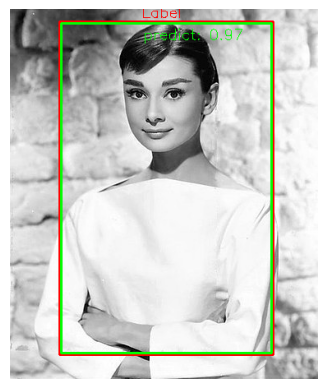

In [56]:
img_rgb = cv.rectangle(img_rgb_copy, (ground_box[0], ground_box[1]), (ground_box[2], ground_box[3]), color = (255, 0, 0), thickness = 2)
label_text = "Label"
cv.putText(img_rgb, label_text, (ground_box[0] + 100, ground_box[1] - 5), cv.FONT_HERSHEY_SIMPLEX, 0.6, color = (255, 0, 0))

img_rgb = cv.rectangle(img_rgb_copy, (best_box[0], best_box[1]), (best_box[2], best_box[3]), color = (0, 255, 0), thickness = 2)
predict_text = "predict: {:.2f}".format(max)
cv.putText(img_rgb, predict_text, (best_box[0] + 100, best_box[1] + 20), cv.FONT_HERSHEY_SIMPLEX, 0.6, color = (0, 255, 0))

print(predict_text)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [57]:
predict_text

'predict: 0.97'